In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [4]:
df=pd.read_csv("data.csv")

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(42000, 785)

In [7]:
x=df.drop("label",axis=1)
y=df['label']
x=x[0:10000]
y=y[0:10000]

In [8]:
print(x.shape)
print(y.shape)

(10000, 784)
(10000,)


In [9]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [10]:
x=np.asarray(x)
y=np.asarray(y)

### Train test split 

In [11]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.24, random_state=42)

### Plotting training data

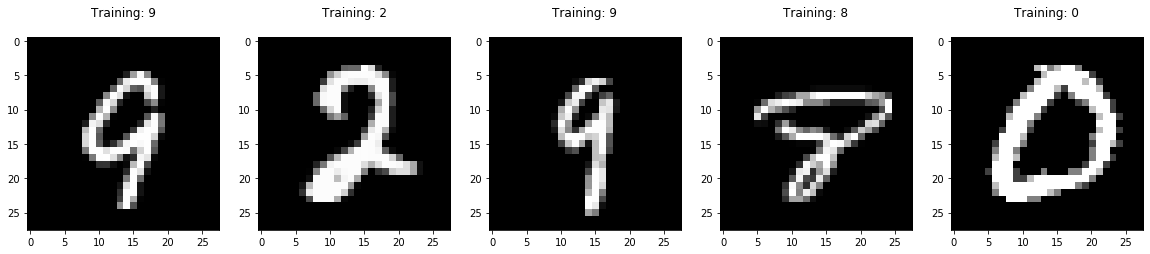

In [12]:
plt.figure(figsize=(20,4))
for index,(image, label) in enumerate(zip(xtrain[0:5],ytrain[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(28,28)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label)

In [13]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(7600, 784)
(7600,)
(2400, 784)
(2400,)


### Plotting predicted data

In [38]:
models=[]
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC(kernel='linear')))
models.append(('LR', LogisticRegression(tol=0.1,  solver='liblinear')))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

In [39]:
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=10, shuffle=True, random_state=1)
    kf_result=cross_val_score(model, xtrain, ytrain,cv=kfold, scoring='accuracy')
    results.append(kf_result)
    names.append(name)
    print('%s: %f (%f)' % (name, kf_result.mean(), kf_result.std()))

KNN: 0.936711 (0.008035)
DTC: 0.787237 (0.015026)
SVM: 0.903947 (0.013118)


/home/tnahsoe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tnahsoe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tnahsoe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tnahsoe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR: 0.894605 (0.014752)
GNB: 0.601974 (0.018526)
RF: 0.942105 (0.009341)


In [32]:
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain, ytrain)
predicted=model.predict(xtest)

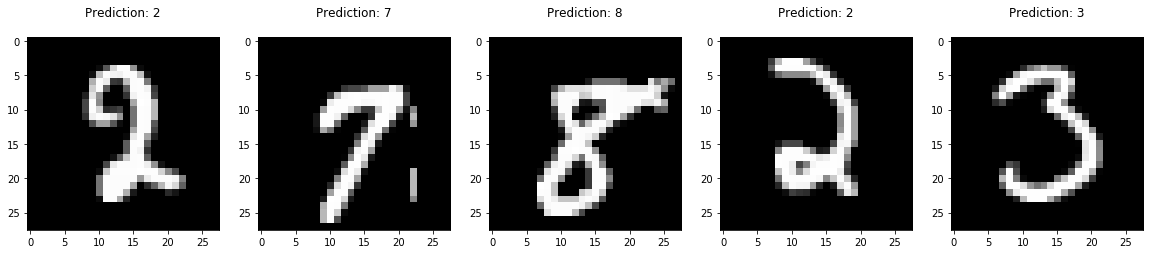

In [33]:
plt.figure(figsize=(20,4))
for index,(image, label) in enumerate(zip(xtest[0:5],predicted[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(28,28)), cmap=plt.cm.gray)
    plt.title("Prediction: %i\n" % label)